# Logistic Regression for classification
## Using Sci Kit Breast Cancer dataset as an example

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

## Training Data

In [105]:
scaler = StandardScaler()
dataset = load_breast_cancer()


x_train = scaler.fit_transform(dataset.data[:,:10])
y_train = dataset.target#.reshape(569,1)

x_features = dataset.feature_names[:10]
y_targets = dataset.target_names

w = np.random.randn(x_train.shape[1])
b = np.random.randn()

threshold = 0.8
lambda_ = 0.1
alpha = 0.1
epochs = 20000
x_samples,x_numFeatures = x_train.shape
y_samples = y_train.shape

print(f"Features (shape:{x_samples},{x_numFeatures}):{x_features}...")
print(x_train[0],"...\n")
print(f"Targets (shape:{y_samples}):{y_targets}")
print(y_train[:10],"...\n")
print(f"Weights:{w}\n")
print(f"Bias:{b}")


Features (shape:569,10):['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension']...
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689] ...

Targets (shape:(569,)):['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0] ...

Weights:[-0.66568239 -1.03784841  0.47797942  0.36807641 -0.46580161 -0.48085134
  1.78926486 -0.50522364 -1.88003842  0.00189066]

Bias:0.34013711404067615


## Plotting the training data

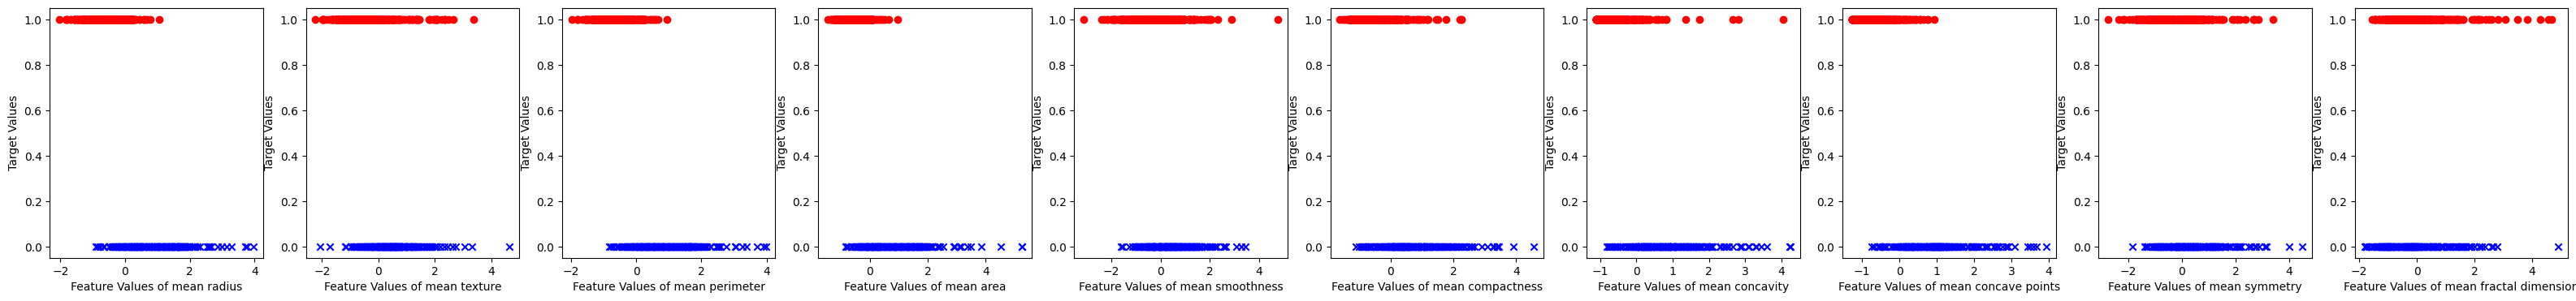

In [33]:
fig,ax = plt.subplots(1,10, figsize=(40,4))
# Scatter plot for each feature against target
for i in range(x_numFeatures):
    for j in range(x_samples):
        if y_train[j] == 1:
            marker = 'o'
            color = "red"
        else:
            marker = 'x'
            color = "blue"
        ax[i].scatter(x_train[j,i], y_train[j], marker=marker,color=color)
    ax[i].set_xlabel(f'Feature Values of {x_features[i]}')
    ax[i].set_ylabel('Target Values')
plt.show()

## Sigmoid Function

In [106]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

## Regression Function

In [107]:
def LR(x,w,b):
    z = np.dot(x,w) + b
    return sigmoid(z)

## Logistic Cost Function

In [108]:
def regCostFunction(x,y,w,b,lambda_):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = x.shape[0]
    loss = np.sum(-y * np.log(LR(x,w,b)) - (1 - y) * np.log(1 - LR(x,w,b)))
    regularization_term = (lambda_ / (2 * m)) * np.sum(w ** 2)
    
    total_cost = (1 / m) * loss + regularization_term
    return total_cost

print(regCostFunction(x_train,y_train,w,b,lambda_))
    
    

0.8206822111661427


## Making Predictions and preliminary evaluation

In [125]:
predicts = LR(x_train,w,b)
pred_y = np.where(predicts > threshold, 1, 0)
results = pred_y == y_train
accuracy = (np.sum(results) / len(results)) * 100

print(f"Your results for each predictions where\nTrue = Right one\nFalse = Wrong One\n\n{results[:50]}")
print(f"Accuracy: {accuracy}")
#print(f"\n\nPredictions:{pred_y}")
#print(f"Targets:{y_train}")
#print(len(pred_y))
#print(len(y_train))
#print(predicts[:50])

Your results for each predictions where
True = Right one
False = Wrong One

[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True False False False False  True  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False]
Accuracy: 56.06326889279437


## Plotting the Model's predictions

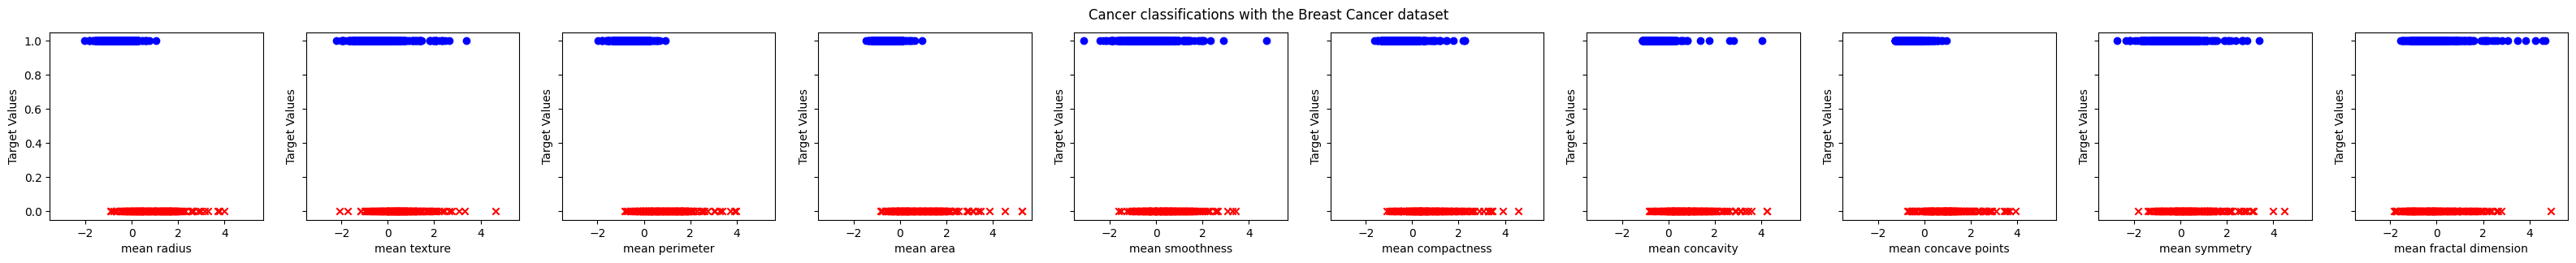

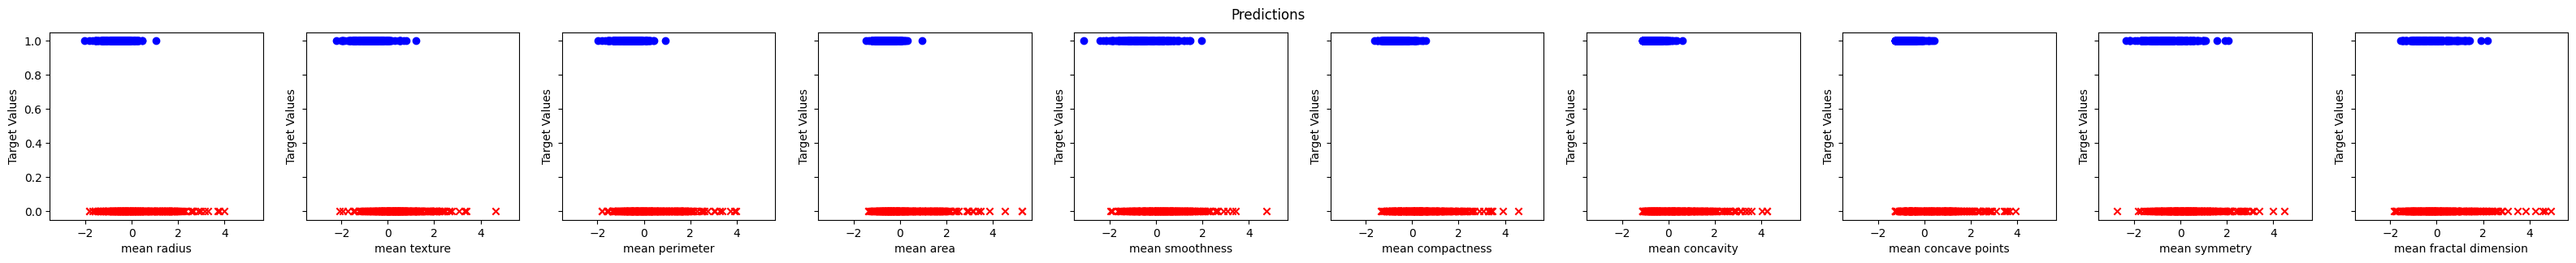

In [62]:
fig1, ax1 = plt.subplots(1,10, figsize=(40,3),sharey=True,sharex=True)
for n in range(x_numFeatures):
    for m in range(x_samples):
        if y_train[m] == 1:
            marker = 'o'
            color = 'blue'
        else:
            marker = 'x'
            color = 'red'
        ax1[n].scatter(x_train[m,n],y_train[m],color=color,marker=marker)
    ax1[n].set_xlabel(x_features[n])
    ax1[n].set_ylabel("Target Values")
fig1.suptitle("Cancer classifications with the Breast Cancer dataset")
    
    

fig2, ax2 = plt.subplots(1,10, figsize=(40,3),sharey=True,sharex=True)
for n in range(x_numFeatures):
    for m in range(x_samples):
        if pred_y[m] == 1:
            marker = 'o'
            color = 'blue'
        else:
            marker = 'x'
            color = 'red'
        ax2[n].scatter(x_train[m,n],pred_y[m],color=color,marker=marker)
    ax2[n].set_xlabel(x_features[n])
    ax2[n].set_ylabel("Target Values")
fig2.suptitle("Predictions")    
        

plt.show()

## Gradient Function

In [110]:
def regGradientFunction(x,y,w,b,lambda_):
    m,n = x.shape
    dj_w = np.zeros(w.shape)
    dj_b = 0
    
    for i in range(m):
        err = LR(x[i],w,b) - y[i]
        for j in range(n):
            dj_w[j] += err * x[i,j]
        dj_b += err
    dj_w = (1 / m) * dj_w
    dj_b = (1 / m) * dj_b
    
    for j in range(n):
        dj_w[j] += (lambda_ / m) * w[j]
    
    return dj_w,dj_b

print(f"Initial W: {w}")
print(f"b: {b}")
aux_w, aux_b = regGradientFunction(x_train,y_train,w,b,lambda_)
print(f"Final W:{aux_w}")
print(f"Final B:{aux_b}")
    
            
        

Initial W: [-0.66568239 -1.03784841  0.47797942  0.36807641 -0.46580161 -0.48085134
  1.78926486 -0.50522364 -1.88003842  0.00189066]
b: 0.34013711404067615
Final W:[ 0.35829567  0.07453769  0.35658304  0.35087823  0.01949526  0.16053426
  0.26892277  0.30025402 -0.09126497 -0.12687479]
Final B:-0.06812123365073196


## Training with Gradient Descent

In [123]:
def GradientDescent(epochs,alpha,lambda_,x,y,w,b):
    m,n = x.shape
    counter = 0
    aux_w = np.zeros(1).reshape(1,1)
    aux_b = 0
    
    for i in range(epochs):
        counter += 1
        aux_w,aux_b = regGradientFunction(x,y,w,b,lambda_)
        
        w = w - alpha * aux_w
        b = b - alpha * aux_b
        
        cost = regCostFunction(x,y,w,b,lambda_)
        if counter % 1000 == 0:
            print(f"Cost at epoch{i + 1}: {cost}")
            counter = 0
    return w,b


final_w,final_b = GradientDescent(epochs,alpha,lambda_,x_train[:500],y_train[:500],w,b)



Cost at epoch1000: 0.1394149176656746
Cost at epoch2000: 0.13594554286539717
Cost at epoch3000: 0.13424929721790752
Cost at epoch4000: 0.13331936585733464
Cost at epoch5000: 0.13282699890076896
Cost at epoch6000: 0.1325626963269898
Cost at epoch7000: 0.13241163455329782
Cost at epoch8000: 0.13231797145658336
Cost at epoch9000: 0.13225489982364702
Cost at epoch10000: 0.13220905425281343
Cost at epoch11000: 0.13217342366269694
Cost at epoch12000: 0.1321441533517534
Cost at epoch13000: 0.13211904082545187
Cost at epoch14000: 0.13209678773377728
Cost at epoch15000: 0.132076607641882
Cost at epoch16000: 0.132058011389574
Cost at epoch17000: 0.1320406858557067
Cost at epoch18000: 0.1320244239121978
Cost at epoch19000: 0.13200908327929126
Cost at epoch20000: 0.1319945620410955


## Results

In [127]:
predicts = LR(x_train[501:],final_w,final_b)
pred_y = np.where(predicts > threshold, 1, 0)
results = pred_y == y_train[501:]
accuracy = (np.sum(results) / len(results)) * 100
cost = regCostFunction(x_train[501:],y_train[501:],final_w,final_b,lambda_)

print(f"Your results for each predictions where\nTrue = Right one\nFalse = Wrong One\n\n{results}")
print(f"Accuracy: {accuracy}")
print(f"Cost: {cost}")
print(f"\n\nPredictions:{pred_y}")
print(f"Targets:{y_train[501:]}")
#print(len(pred_y))
#print(len(y_train))
#print(predicts)

Your results for each predictions where
True = Right one
False = Wrong One

[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
 False  True  True  True False False False  True False  True  True  True
  True  True  True False  True False  True  True  True False  True False
  True  True  True  True  True  True  True  True]
Accuracy: 82.35294117647058
Cost: 0.1786457948595908


Predictions:[0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1]
Targets:[0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1]
